# Book Classification - Afprøvning 2

In [13]:
import os
import pickle
import pandas as pd
import numpy as np
import string
from scipy.stats import randint
import seaborn as sns # used for plot interactive graph.
import matplotlib.pyplot as plt
import seaborn as sns
from io import StringIO
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_selection import chi2



from IPython.display import display
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from wordcloud import WordCloud

import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import SnowballStemmer
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer

import warnings
# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

import re
from collections import defaultdict, Counter

In [14]:
import nltk
nltk.download('omw-1.4')
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\rasmu\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\rasmu\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\rasmu\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\rasmu\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\rasmu\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

# Preprocessing functions

### The preprocessing functions has been modified to remove the 10 most common words in the clean text

In [15]:
# These prepocessing functions is based on the following: https://github.com/vijayaiitk/NLP-text-classification-model
# These functions has been slightly modified
    
text = "100,000 years ago, at least six human species inhabited the earth. Today there is just one. New york times"
text1 = "100,000 years ago, at least six human species inhabited the earth. Today there is just one. New york times"

def preprocess(text):
    text = text.lower() 
    text=text.strip()  
    text=re.compile('<.*?>').sub('', text)
    text = re.compile('[%s]' % re.escape(string.punctuation)).sub(' ', text)
    text = re.sub('\s+', ' ', text)  
    text = re.sub(r'\[[0-9]*\]',' ',text)
    text=re.sub(r'[^\w\s]', '', str(text).lower().strip())
    text = re.sub(r'\d',' ',text) 
    text = re.sub(r'\s+',' ',text) 
    
    
    text = re.sub(r'one',' ',text)
    text = re.sub(r'less',' ',text)
    text = re.sub(r'new',' ',text)
    text = re.sub(r'life',' ',text)
    text = re.sub(r'world',' ',text)
    text = re.sub(r'time',' ',text)
    text = re.sub(r'find',' ',text)
    text = re.sub(r'know',' ',text)
    text = re.sub(r'year',' ',text)
    text = re.sub(r'make',' ',text)
    
    text = re.sub(r'new york time','',text)
    text = re.sub(r'cover edition','',text)
    text = re.sub(r'pulitzer prize','',text)
    text = re.sub(r'bestselling','',text)
    
    
    return text
print(text1)
text=preprocess(text)
print(text)

100,000 years ago, at least six human species inhabited the earth. Today there is just one. New york times
  s ago at least six human species inhabited the earth today there is just     york  s


In [16]:
text = "100,000 years ago, at least six human species inhabited the earth. Today there is just one. New york times"

 
#1. STOPWORD REMOVAL
def stopword(string):
    a= [i for i in string.split() if i not in stopwords.words('english')]
    return ' '.join(a)

text=stopword(text)
print(text)

#2. STEMMING
 
snow = SnowballStemmer('english')
def stemming(string):
    a=[snow.stem(i) for i in word_tokenize(string) ]
    return " ".join(a)
text=stemming(text)
print(text)

#3. LEMMATIZATION

wl = WordNetLemmatizer()
 
def get_wordnet_pos(tag):
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN
    

# Tokenize the sentence
def lemmatizer(string):
    word_pos_tags = nltk.pos_tag(word_tokenize(string)) # Get position tags
    a=[wl.lemmatize(tag[0], get_wordnet_pos(tag[1])) for idx, tag in enumerate(word_pos_tags)] # Map the position tag and lemmatize the word/token
    return " ".join(a)

text = lemmatizer(text)
print(text)

100,000 years ago, least six human species inhabited earth. Today one. New york times
100,000 year ago , least six human speci inhabit earth . today one . new york time
100,000 year ago , least six human speci inhabit earth . today one . new york time


In [17]:
def finalpreprocess(string):
    return lemmatizer(stopword(preprocess(string)))

In [18]:
print(text1)
finalpreprocess(text)

100,000 years ago, at least six human species inhabited the earth. Today there is just one. New york times


'ago least six human speci inhabit earth today york'

# Get TagMyBook data

In [19]:
df = pd.read_csv('data.csv')

## Clean synopsis - Skip this and download pickle instead

In [20]:
df['clean_synopsis'] = df['synopsis'].apply(lambda x: finalpreprocess(x))

with open('cleansedData.pickle', 'wb') as f:
    pickle.dump(df, f, pickle.HIGHEST_PROTOCOL)

# Download pickle

In [29]:
with open('cleansedData.pickle', 'rb') as f:
    df = pickle.load(f)
display(df)

,Unnamed: 0,title,rating,name,num_ratings,num_reviews,num_followers,synopsis,genre,clean_synopsis
0,0,Sapiens: A Brief History of Humankind,4.39,Yuval Noah Harari,"8,06,229","46,149",30.5k,"100,000 years ago, at least six human species ...",history,ago least six human specie inhabit earth today...
1,1,"Guns, Germs, and Steel: The Fates of Human Soc...",4.04,Jared Diamond,"3,67,056","12,879","6,538","""Diamond has written a book of remarkable scop...",history,diamond write book remarkable scope important ...
2,2,A People's History of the United States,4.07,Howard Zinn,"2,24,620","6,509","2,354","In the book, Zinn presented a different side o...",history,book zinn present different side history tradi...
3,3,"The Devil in the White City: Murder, Magic, an...",3.99,Erik Larson,"6,13,157","36,644",64.2k,Author Erik Larson imbues the incredible event...,history,author erik larson imbues incredible event sur...
4,4,The Diary of a Young Girl,4.18,Anne Frank,"33,13,033","35,591","4,621",Discovered in the attic in which she spent the...,history,discover attic spent last anne frank remarkabl...
...,...,...,...,...,...,...,...,...,...,...
1534,1534,Hounded,4.09,Kevin Hearne,"83,827","7,203","11,905","Atticus O’Sullivan, last of the Druids, lives ...",fantasy,atticus osullivan last druid live peacefully a...
1535,1535,Charlie and the Chocolate Factory,4.15,Roald Dahl,"7,75,001","14,252","22,897",Charlie Bucket's wonderful adventure begins wh...,fantasy,charlie bucket wonderful adventure begin mr wi...
1536,1536,Red Rising,4.25,Pierce Brown,"3,10,138","30,388","30,510","""I live for the dream that my children will be...",fantasy,live dream child bear free say like land fathe...
1537,1537,Frostbite,4.26,Richelle Mead,"3,37,538","12,435","66,448","Rose loves Dimitri, Dimitri might love Tasha, ...",fantasy,rise love dimitri dimitri might love tasha mas...


## Most common words after cleansing

In [30]:
Counter(" ".join(df["clean_synopsis"]).split()).most_common(10)

[('book', 461),
 ('first', 441),
 ('love', 437),
 ('take', 426),
 ('story', 411),
 ('secret', 401),
 ('come', 396),
 ('man', 373),
 ('even', 354),
 ('live', 353)]

# N-gram visualization

In [31]:
def generate_N_grams(text,ngram=1):
    words=[word for word in text.split(" ")]  
    temp=zip(*[words[i:] for i in range(0,ngram)])
    ans=[' '.join(ngram) for ngram in temp]
    return ans

In [32]:
def plot_genre_ngram(genre,ngram_size = 2):
    genreValues=defaultdict(int)
    for text in df[df.genre==genre].clean_synopsis:
        for word in generate_N_grams(text,ngram_size):
            genreValues[word]+=1
            
    df_genre=pd.DataFrame(sorted(genreValues.items(), key=lambda x:x[1], reverse=True))
    
    genre_ngram=df_genre[0][:10]
    genre_count=df_genre[1][:10]
    
    plt.figure(1,figsize=(16, 4))
    plt.bar(genre_ngram, genre_count, color ='green', width = 0.4)
    plt.xlabel(f'Words in {genre} dataframe')
    plt.ylabel("Count")
    plt.title(f"{genre.capitalize()} {ngram_size}-gram Analysis", fontsize=28)
    plt.xticks(rotation=45)
    plt.show()

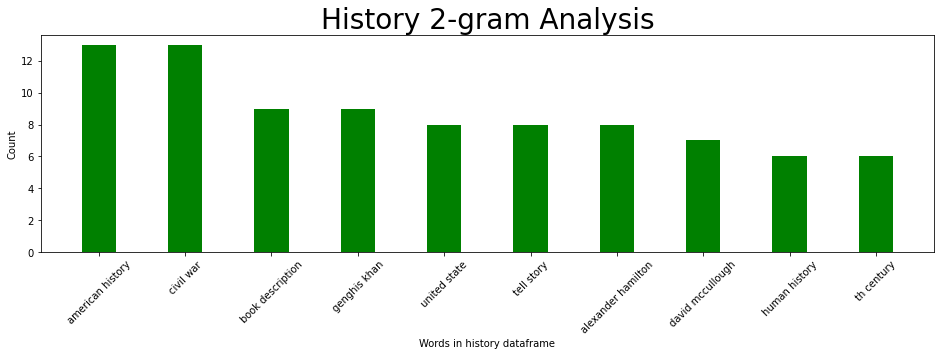

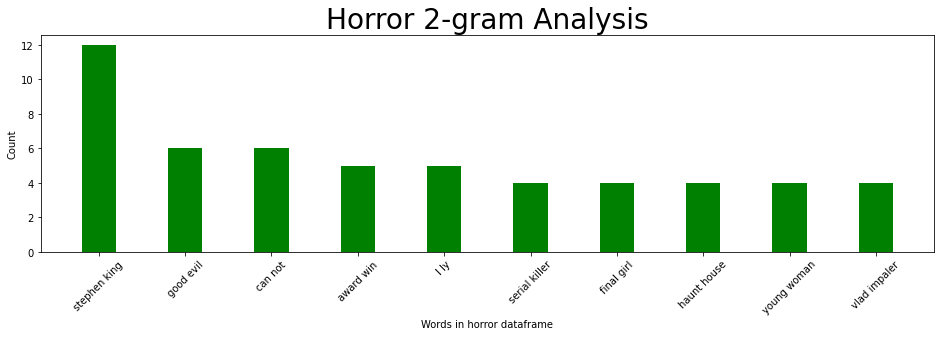

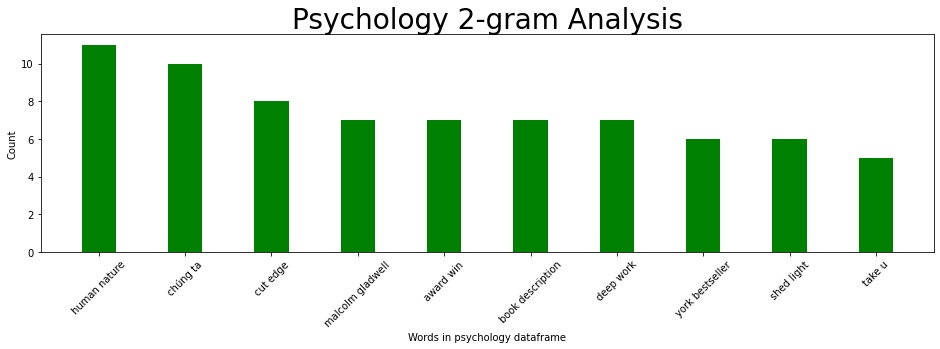

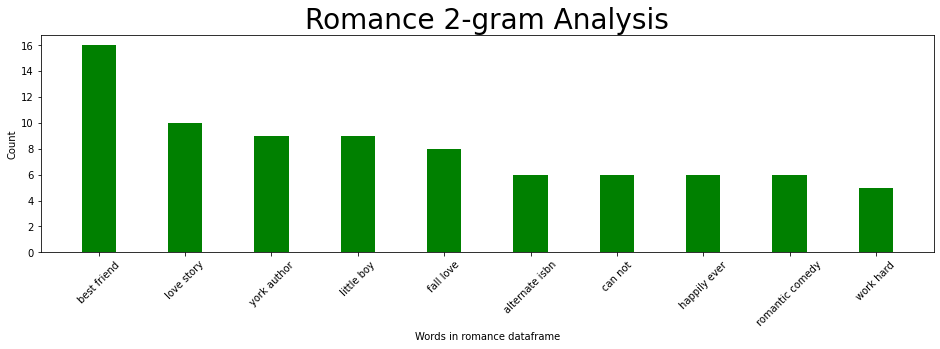

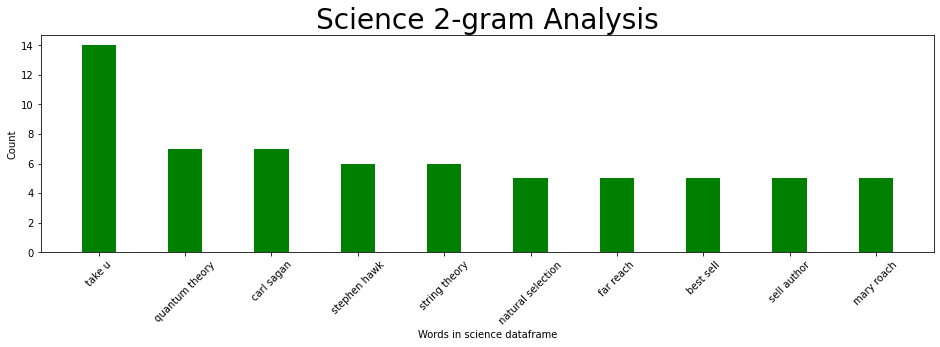

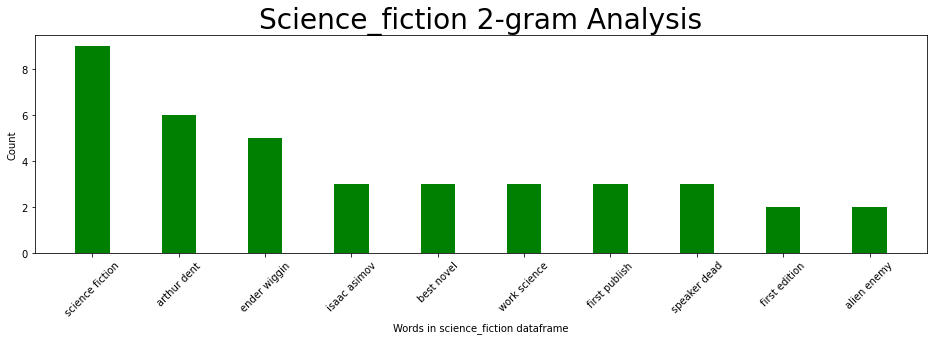

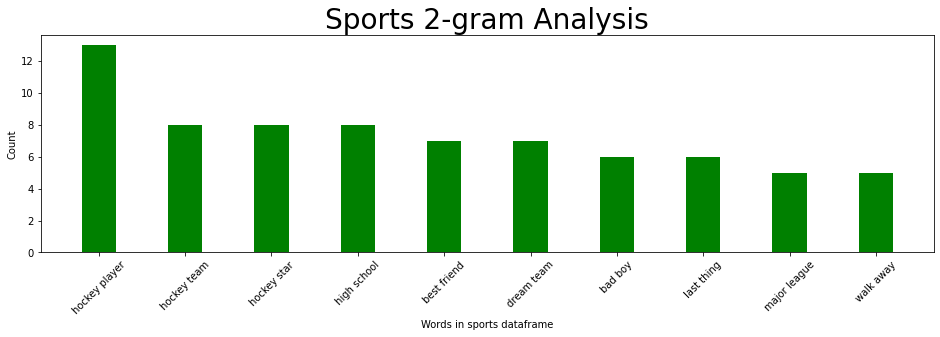

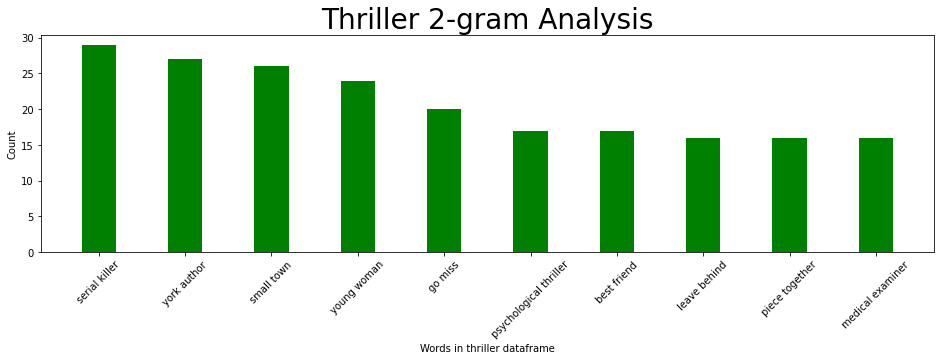

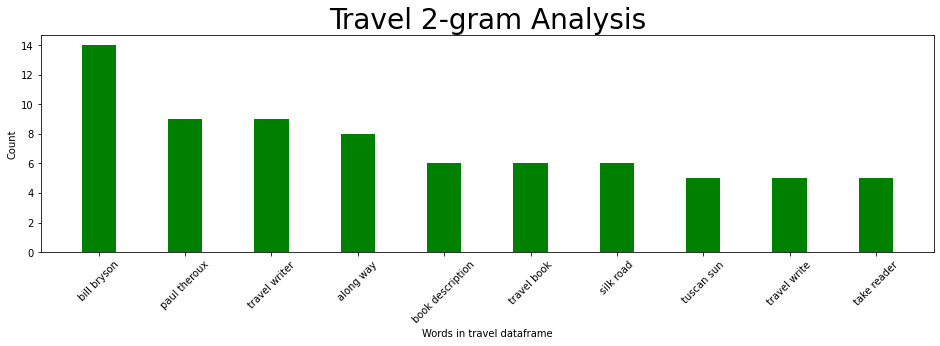

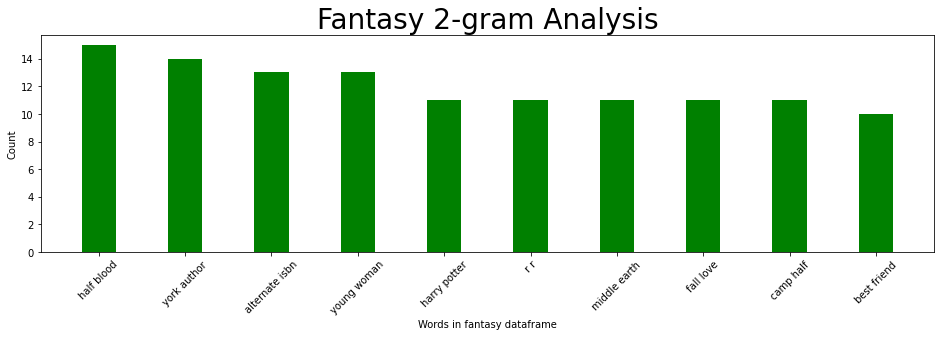

In [25]:
genres = df['genre'].unique()
for genre in genres:
    plot_genre_ngram(genre,2)

# Wordcloud visualization

In [26]:
def word_cloud(genre):
    df_genre = df.loc[df['genre']==genre]
    text = ' '.join(genre for genre in df_genre.clean_synopsis)
    wordcloud = WordCloud().generate(text)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.savefig(f'{genre}.pdf',bbox_inches='tight')
    plt.axis("off")
    plt.title(genre.capitalize(),fontsize=28)
    plt.show()

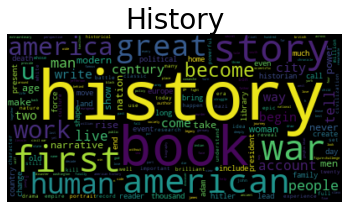

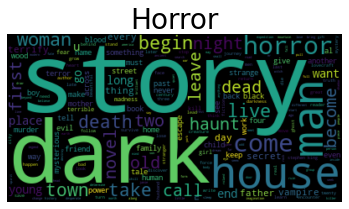

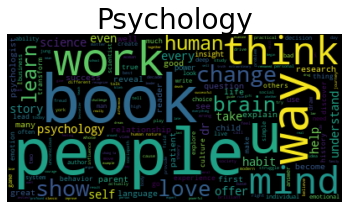

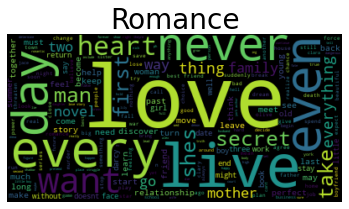

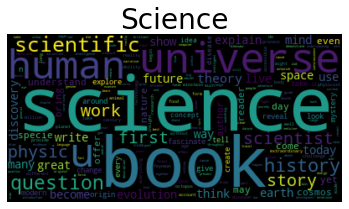

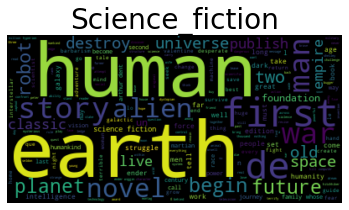

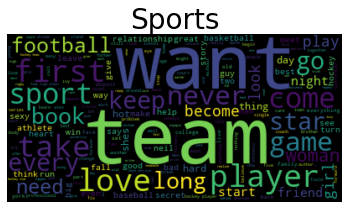

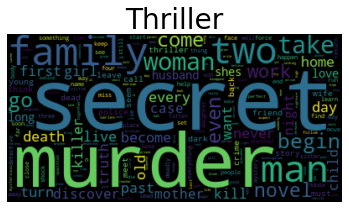

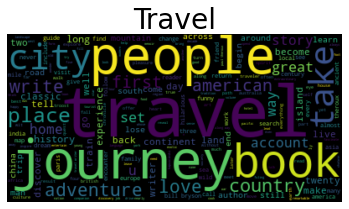

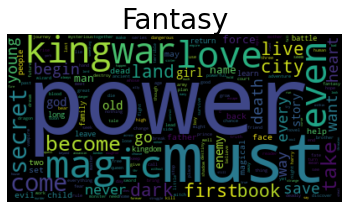

In [27]:
genres = df['genre'].unique()
for genre in genres:
    word_cloud(genre)

### Add columns with category ids as numbers

In [33]:
# Create a new column 'category_id' with encoded categories 
df['category_id'] = df['genre'].factorize()[0]
category_id_df = df[['genre', 'category_id']].drop_duplicates()
display(category_id_df)

# Dictionaries for future use
category_to_id = dict(category_id_df.values)
id_to_category = dict(category_id_df[['category_id', 'genre']].values)

,genre,category_id
0,history,0
99,horror,1
199,psychology,2
298,romance,3
409,science,4
488,science_fiction,5
533,sports,6
612,thriller,7
1093,travel,8
1191,fantasy,9


genre
fantasy            348
history             99
horror             100
psychology          99
romance            111
science             79
science_fiction     45
sports              79
thriller           481
travel              98
Name: genre, dtype: int64

<Figure size 576x432 with 0 Axes>

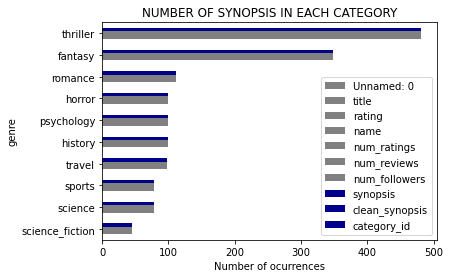

In [34]:
fig = plt.figure(figsize=(8,6))
colors = ['grey','grey','grey','grey','grey','grey','grey','darkblue','darkblue','darkblue']
df.groupby('genre').count().sort_values(['category_id']).plot.barh(
    ylim=0, color=colors, title= 'NUMBER OF SYNOPSIS IN EACH CATEGORY')
plt.xlabel('Number of ocurrences', fontsize = 10);

display(df.groupby('genre')['genre'].count())

In [35]:
tfidf = TfidfVectorizer(use_idf=True, sublinear_tf=True, min_df=5,
                        #max_features=512,
                        ngram_range=(1, 2), 
                        stop_words='english')
# We transform each 'clean text' into a vector
features = tfidf.fit_transform(df.clean_synopsis).toarray()
labels = df.category_id
print("Each of the %d 'clean text' is represented by %d features (TF-IDF score of unigrams and bigrams)" %(features.shape))

Each of the 1539 'clean text' is represented by 4266 features (TF-IDF score of unigrams and bigrams)


In [36]:
def test():
  # run block of code and catch warnings
  with warnings.catch_warnings():
    # Finding the three most correlated terms with each of the product categories
    N = 3
    for genre, category_id in sorted(category_to_id.items()):
      features_chi2 = chi2(features, labels == category_id)
      indices = np.argsort(features_chi2[0])
      feature_names = np.array(tfidf.get_feature_names())[indices]
      unigrams = [v for v in feature_names if len(v.split(' ')) == 1]
      bigrams = [v for v in feature_names if len(v.split(' ')) == 2]
      print(f"\n==> {genre}:")
      print("  * Most Correlated Unigrams are: %s" %(', '.join(unigrams[-N:])))
      print("  * Most Correlated Bigrams are: %s" %(', '.join(bigrams[-N:])))
test()


==> fantasy:
  * Most Correlated Unigrams are: magical, wizard, magic
  * Most Correlated Bigrams are: ankh morpork, half blood, harry potter

==> history:
  * Most Correlated Unigrams are: hitler, biography, history
  * Most Correlated Bigrams are: thomas jefferson, american history, civil war

==> horror:
  * Most Correlated Unigrams are: madness, eerie, horror
  * Most Correlated Bigrams are: place live, ghost story, stephen king

==> psychology:
  * Most Correlated Unigrams are: jung, psychologist, psychology
  * Most Correlated Bigrams are: human nature, shed light, malcolm gladwell

==> romance:
  * Most Correlated Unigrams are: romantic, darcy, love
  * Most Correlated Bigrams are: thing want, love story, romantic comedy

==> science:
  * Most Correlated Unigrams are: science, universe, physic
  * Most Correlated Bigrams are: quantum theory, mary roach, carl sagan

==> science_fiction:
  * Most Correlated Unigrams are: galactic, interstellar, alien
  * Most Correlated Bigrams a

In [37]:
X = df['clean_synopsis'] # Collection of 'clean synopsis'
y = df['genre'] # Target or the labels we want to predict (i.e., the 10 different genres)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.20,
                                                    random_state = 1)

## Models to evaluate

In [38]:
models = [
    RandomForestClassifier(n_estimators=200, max_depth=6, random_state=0),
    LinearSVC(),
    LogisticRegression(random_state=0, solver = 'liblinear', C=10, penalty = 'l2'),
]

In [39]:
CV = 3
cv_df = pd.DataFrame(index=range(CV * len(models)))

In [41]:
from sklearn.model_selection import cross_validate
entries = []


for model in models:
  model_name = model.__class__.__name__
  accuracies = cross_val_score(model, features, labels, scoring='accuracy', cv=CV)
  for fold_idx, accuracy in enumerate(accuracies):
    entries.append((model_name, fold_idx, accuracy))
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])
display(cv_df)

,model_name,fold_idx,accuracy
0,RandomForestClassifier,0,0.446394
1,RandomForestClassifier,1,0.426901
2,RandomForestClassifier,2,0.438596
3,LinearSVC,0,0.769981
4,LinearSVC,1,0.746589
5,LinearSVC,2,0.744639
6,LogisticRegression,0,0.760234
7,LogisticRegression,1,0.736842
8,LogisticRegression,2,0.736842


## Model Performance

In [42]:
mean_accuracy = cv_df.groupby('model_name').accuracy.mean()
std_accuracy = cv_df.groupby('model_name').accuracy.std()

acc = pd.concat([mean_accuracy, std_accuracy], axis= 1, 
          ignore_index=True)
acc.columns = ['Mean Accuracy', 'Standard deviation']
acc

,Mean Accuracy,Standard deviation
model_name,,
LinearSVC,0.753736,0.014102
LogisticRegression,0.744639,0.013505
RandomForestClassifier,0.437297,0.009811


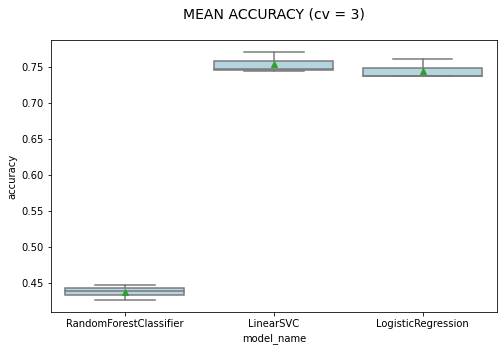

In [43]:
plt.figure(figsize=(8,5))
sns.boxplot(x='model_name', y='accuracy', 
            data=cv_df, 
            color='lightblue', 
            showmeans=True)
plt.title("MEAN ACCURACY (cv = 3)\n", size=14);

In [44]:
X_train, X_test, y_train, y_test,indices_train,indices_test = train_test_split(features, 
                                                               labels, 
                                                               df.index, test_size=0.20, 
                                                               random_state=1)

model = LinearSVC()
model.fit(X_train, y_train)
y_pred_linearSVC = model.predict(X_test)

model = LogisticRegression(random_state=0, solver = 'liblinear', C=10, penalty = 'l2')
model.fit(X_train, y_train)
y_pred_logisticRegression = model.predict(X_test)
proba_logisticRegression = model.predict_proba(X_test)

model = RandomForestClassifier(n_estimators=200, max_depth=6, random_state=0, max_features="sqrt")
model.fit(X_train, y_train)
y_pred_RFC = model.predict(X_test) 

## Classification reports

In [45]:

names = ["linearSVC", "logisticRegression", "RandomForest"]
for name, y_pred in zip(names, [y_pred_linearSVC, y_pred_logisticRegression, y_pred_RFC]):
  print(f'\t{name} CLASSIFICATIION METRICS\n')
  print(metrics.classification_report(y_test, y_pred, target_names= df['genre'].unique()))
  print()

	linearSVC CLASSIFICATIION METRICS

                 precision    recall  f1-score   support

        history       0.78      0.78      0.78        18
         horror       0.62      0.25      0.36        20
     psychology       0.94      0.77      0.85        22
        romance       0.50      0.39      0.44        18
        science       0.85      0.92      0.88        12
science_fiction       1.00      0.44      0.62         9
         sports       0.93      0.76      0.84        17
       thriller       0.76      0.90      0.82       108
         travel       0.86      0.80      0.83        15
        fantasy       0.79      0.88      0.84        69

       accuracy                           0.78       308
      macro avg       0.80      0.69      0.72       308
   weighted avg       0.78      0.78      0.77       308


	logisticRegression CLASSIFICATIION METRICS

                 precision    recall  f1-score   support

        history       0.79      0.61      0.69        18
  

C:\Users\rasmu\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\rasmu\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\rasmu\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [46]:
def plot_confusion(y_test, y_pred, title, figsize=(8,8)):
  conf_mat = confusion_matrix(y_test, y_pred)
  fig, ax = plt.subplots(figsize=figsize)
  sns.heatmap(conf_mat, annot=True, cmap="Blues", fmt='d',
              xticklabels=category_id_df.genre.values, 
              yticklabels=category_id_df.genre.values)
  plt.ylabel('Actual')
  plt.xlabel('Predicted')
  plt.title(f"{title}", size=16);

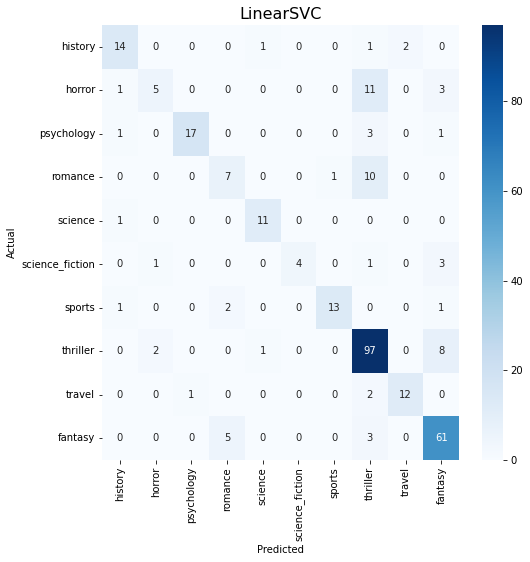

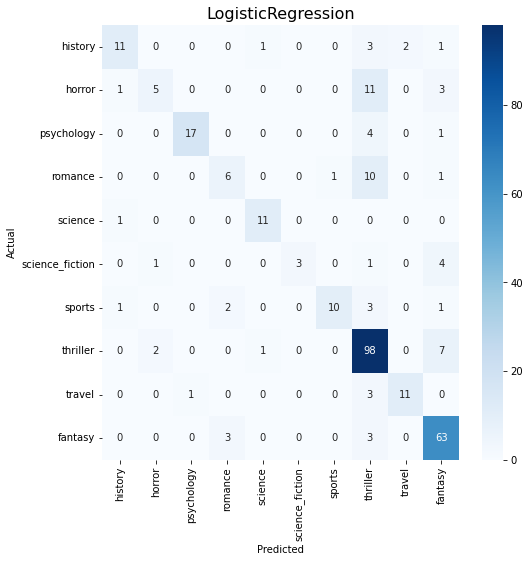

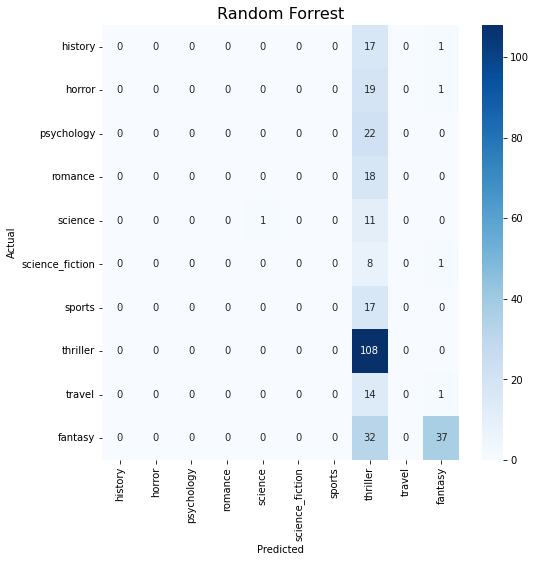

In [47]:
plot_confusion(y_test, y_pred_linearSVC, "LinearSVC")
plot_confusion(y_test, y_pred_logisticRegression, "LogisticRegression")
plot_confusion(y_test, y_pred_RFC, "Random Forrest")